#  Land Valuation Modeling in Al-Tharawat: Regression vs. KNN  
### Progress Report – Final Project (IST341)  
### Mohammed & IST341_Participant_5 – IST341 – Spring 2025.


## 📌 Project Introduction

In this project we try to use Linear Regression to predict land price in our area in the south of Saudi Arabia. The dataset we use is builded manually from real examples in a new area called "Al-Tharawat" in our region.

In the proposal before we start with only 50 rows, but now we increase it to 90 rows to make the data more useful. We collect this data from a real estate office who know the prices in the area. We include different features like land area, number of streets, if it is a corner land or not, and land use (residential or commercial).  

We begin by using  Linear Regression to test how well it can learn the prices from these features. and then we can try other model (like KNN Regressor) to compare it with linear regression.


## Progress So Far

Since the proposal, we worked more on collecting data. At first we only had 50 rows, but now we increase it to 90 rows. We collect this data manually from a real estate office in south of Saudi Arabia, who give us real prices from new area called Al-Tharawat.

Then we open the CSV file in pandas to check the structure and data types. We look at the values to make sure there is no missing or strange data. Everything looks clean, and now we are ready to use Linear Regression model.

We follow the material from previouse Notebook about Linear Regression. We use the same steps and now we try it on our dataset to predict some featuers.


## Step 1: Load the dataset

We show first rows to check structure before modeling.


In [ ]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv('Tharawat.csv')

# Show first rows
df.head()


,Plot_ID,Development_Name,Area_sqm,Num_Street_Faces,Land_Use,Corner,Street_Width,Price_SAR,Price_per_sqm,Source
0,P-001,Al-Tharawat,4219,1,Commercial,Corner Plot,30,11275488,2672.55,Al-Hayam Real Estate
1,P-002,Al-Tharawat,586,1,Residential,Regular Plot,15,674779,1151.50,Al-Hayam Real Estate
2,P-003,Al-Tharawat,686,1,Residential,Corner Plot,15,787686,1148.23,Al-Hayam Real Estate
3,P-004,Al-Tharawat,1463,1,Investment,Regular Plot,20,2199006,1503.08,Al-Hayam Real Estate
4,P-005,Al-Tharawat,2322,1,Commercial,Regular Plot,30,5830751,2511.09,Al-Hayam Real Estate


In [ ]:
# Show dataset structure and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plot_ID           90 non-null     object 
 1   Development_Name  90 non-null     object 
 2   Area_sqm          90 non-null     int64  
 3   Num_Street_Faces  90 non-null     int64  
 4   Land_Use          90 non-null     object 
 5   Corner            90 non-null     object 
 6   Street_Width      90 non-null     int64  
 7   Price_SAR         90 non-null     int64  
 8   Price_per_sqm     90 non-null     float64
 9   Source            90 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.2+ KB


In [ ]:
# Show basic stats like mean, min, max
df.describe()

,Area_sqm,Num_Street_Faces,Street_Width,Price_SAR,Price_per_sqm
count,90.000000,90.000000,90.000000,9.000000e+01,90.000000
mean,1576.088889,1.311111,19.555556,3.368650e+06,1557.004111
std,1394.275887,0.465542,8.793653,4.170925e+06,713.142291
min,450.000000,1.000000,10.000000,3.947890e+05,803.260000
25%,608.250000,1.000000,10.000000,5.858070e+05,957.267500
50%,727.000000,1.000000,15.000000,7.752720e+05,1149.865000
75%,1899.000000,2.000000,30.000000,4.700501e+06,2355.162500
max,4755.000000,2.000000,30.000000,1.376202e+07,2941.860000


## Step 2 – Modeling with Linear Regression

We start by selecting the features (X) and the target (y), and then we split the data into training and testing sets. This helps us test how good the model is.


In [ ]:
# Select the features (input columns)
X = df[['Area_sqm', 'Num_Street_Faces', 'Street_Width']]

# Select the target column (output)
y = df['Price_SAR']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Show first 5 predictions vs actual prices
print("Predicted Prices:", y_pred[:5])
print("Actual Prices:   ", y_test.values[:5])


Predicted Prices: [ 2699807.66882168   736771.91667402 12298890.11987341   332173.22789167
 11175156.16489031]
Actual Prices:    [ 2438102   632649 13035318   529936 11275488]


##  Step 3 – Evaluate the Model

Now we evaluate the model using the R² score to see how well the model fits the data.


In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the result
print("R-squared Score:", r2)

R-squared Score: 0.9906668503646635


##  Step 4 – Visualization

Now we make a scatter plot to compare the real prices (y_test) with the predicted prices (y_pred). This helps us see how close the model predictions are to the actual prices.


In [ ]:
# Scatter plot: real vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


### Step 5 – Feature Impact Analysis

To better understand which feature is the most important in predicting land prices, we remove each feature one by one and test how the model performance changes. We calculate the R-squared score in each case to see how the accuracy is affected.


In [ ]:
# Remove 'Area_sqm' and test the model
X = df[['Num_Street_Faces', 'Street_Width']]
y = df['Price_SAR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared without Area_sqm:", r2)


R-squared without Area_sqm: 0.5781951847631156


**Observation:** When we removed `Area_sqm`, the R-squared dropped a lot. This means land area is very important for price prediction.


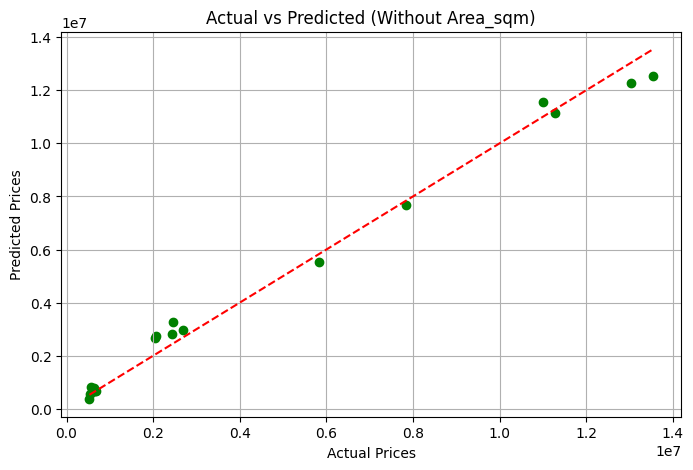

In [ ]:
# Scatter plot for model without 'Area_sqm'
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Without Area_sqm)")
plt.grid(True)
plt.show()


In [ ]:
# Remove 'Num_Street_Faces' and test the model
X = df[['Area_sqm', 'Street_Width']]
y = df['Price_SAR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared without Num_Street_Faces:", r2)


R-squared without Num_Street_Faces: 0.9895427812121272


**Observation:** When we removed `Num_Street_Faces`, the model performance stayed high. This feature is helpful but not as critical as `Area_sqm`.


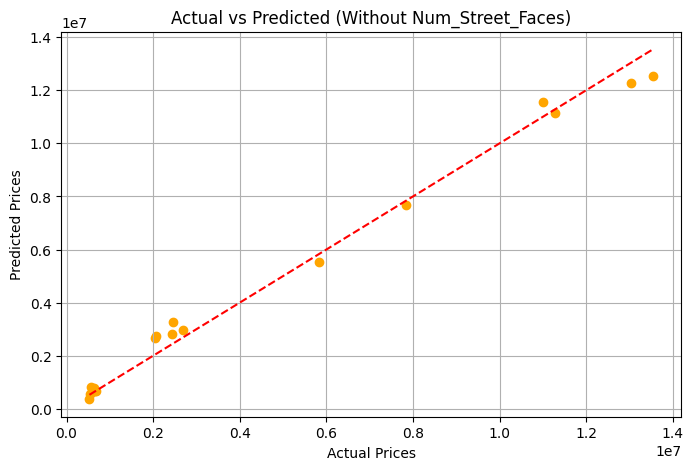

In [ ]:
# Scatter plot for model without 'Num_Street_Faces'
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Without Num_Street_Faces)")
plt.grid(True)
plt.show()


In [ ]:
# Remove 'Street_Width' and test the model
X = df[['Area_sqm', 'Num_Street_Faces']]
y = df['Price_SAR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared without Street_Width:", r2)


R-squared without Street_Width: 0.9901474421917299


**Observation:** Removing `Street_Width` caused a small drop in performance. It has some importance but not as much as `Area_sqm`.


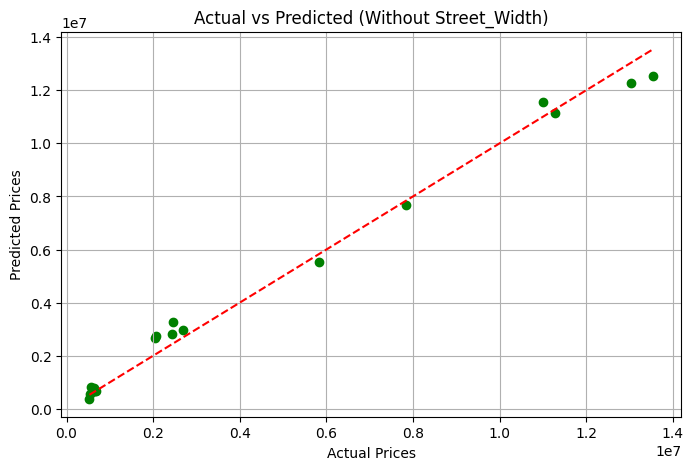

In [ ]:
# Scatter plot for model without 'Street_Width'
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Without Street_Width)")
plt.grid(True)
plt.show()


We see that the Linear Regression model gives very high R-squared score (0.99), which means it predicts land price very well in our dataset. The visualization also shows that predicted prices are close to the actual prices.

But our dataset is small (only 90 rows), and we collect it from one real estate office in our region. Maybe if we add more data from other places, the model will not be perfect.

Next step, we want to try other models like KNN Regressor to compare the results.


### What’s Next

Before the presentation, we will try to use KNN Regressor on the same dataset to compare it with Linear Regression. We want to see which model gives better results in our case.

Also, we are still working on adding more rows to the dataset, and maybe we will try some visualization to compare more features like land area and land use.

We want to improve our understanding of the models and prepare for the next steps in our project.


### Step 6 – Modeling with KNN Regressor

Now we try a different model: KNN Regressor.  
We use the same three features: Area_sqm, Num_Street_Faces, and Street_Width.  
We want to compare its results with Linear Regression to see which model performs better.


R-squared Score (KNN): 0.9880620330044071


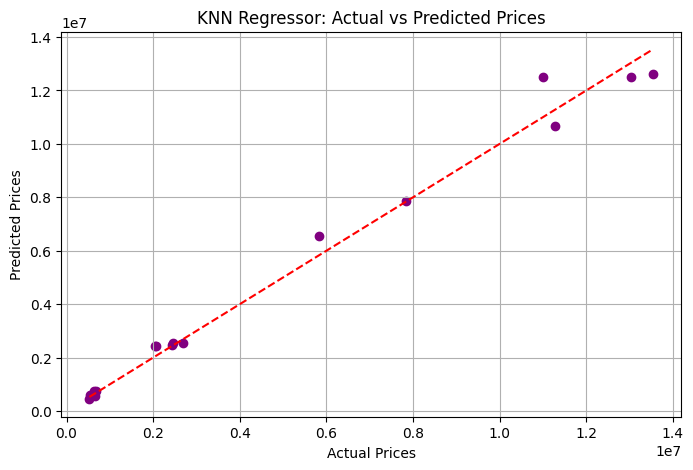

In [ ]:
# Step 6 – Modeling with KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Use the same features
X = df[['Area_sqm', 'Num_Street_Faces', 'Street_Width']]
y = df['Price_SAR']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
print("R-squared Score (KNN):", r2_knn)

# Visualize the predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_knn, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN Regressor: Actual vs Predicted Prices")
plt.grid(True)
plt.show()


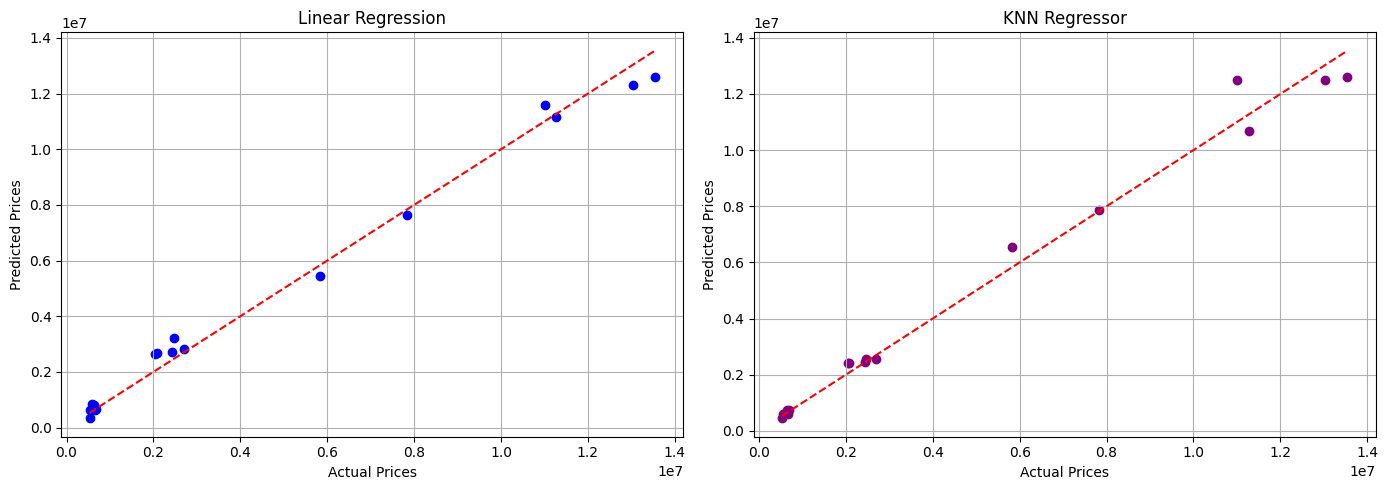

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('Tharawat.csv')

# Define features and target
features = ['Area_sqm', 'Num_Street_Faces', 'Street_Width']
target = 'Price_SAR'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Compare visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Linear Regression
axs[0].scatter(y_test, y_pred_lr, color='blue')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[0].set_title("Linear Regression")
axs[0].set_xlabel("Actual Prices")
axs[0].set_ylabel("Predicted Prices")
axs[0].grid(True)

# Plot KNN Regressor
axs[1].scatter(y_test, y_pred_knn, color='purple')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[1].set_title("KNN Regressor")
axs[1].set_xlabel("Actual Prices")
axs[1].set_ylabel("Predicted Prices")
axs[1].grid(True)

plt.tight_layout()
plt.show()
